<a href="https://colab.research.google.com/github/SteffanBurnette/TensorFlow-/blob/Testing_out_regression_neural_network_for_predicting_direction_of_future_stock_price/Stock_price_analysis_test_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Goal: Create a Regression neureal network that will be able to predict the future price of a stock when given the following metrics:
* **Opening Price** - The price that the security started the day as.
* **High** - The highest price of the security for the day.
* **Low** - The lowest price of the security for the day.
* **Closing price** - The price of the security when the market closes.
* **Trading Volume** - The total quantity of shares or contracts traded for a specified security.

When preparing the data, I think it would be best to **normalize** it since i still want to keep the proper distributions intact, but the put all values within the same range so that the model can make more precise decisions.

**Normalization** - Changing the values of the numerical columns in the dataset to a common scale, without distorting differences in the ranges of values.

##Steps to take to train the network:
1. Use a **pandas DataFrame** to load in the data (or yahoo finance API depending on what I find to be better).
2. Properly define the **Features** and **Labels** so that I know what values to feed into the neural network and what value(s) I should be recieving.
3. **Normalize** the dataset so that all numbers encompass the same range but keep the distribution difference (might not need to use the **OneHotEncoder** since there isnt a non numerical column and will only used the **MinMaxScaler** for data **Normalization**).
4. Split the dataset up into **Training** and **Testing** datasets, so that the model doesnt just get use to solving the same problems( So that we **Generalize** the neural network).
5. Test out different **Optimizers** (mainly **Stochastic Gradient Descent(SGD)** and **Adam**) and experiment with the learning rate(Find the optimal learning rate by plotting the **loss curve**).
6. Test out different training lengths (**epochs**).
7. Test out creating different amounts of **layers** and **Nuerons**(Maybe try out the **linear activation function** but most likely wont contribute anything to the project).
8. Evlaute the performace of the model to keep track of improvement.
9. Test the model to make future predictions (Maybe on older values where we know the outcome, then current values and compare them with the true values the next day (does **predictions**==**Actual Values**)).
10. Save the model for use in future projects if everything works as expected.

###The STONK that shall be analyzed is dodge boi TESLA

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

Will Be working on 758 clolumns of tesla stock data ranging from the start date of october 15th 2015 to october 15th 2018; Three years of stock data

**Columns: date, close, volume, open, high and low**

In [ ]:
#Preparing the data
tesla = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/tesla-stock-price.csv")
tesla.head()
#Changes the volume column from string to float
tesla["volume"] = tesla["volume"].str.replace(',', '').astype(float)

#This will be the features that the model will take in
tesla_X = tesla[["open", "high", "low", "volume"]]
print(tesla_X)

#This will be the labels that the model will try to predict
tesla_y = tesla[["close"]]
print(tesla_y)

tesla_X_train, tesla_X_test, tesla_y_train, tesla_y_test = train_test_split(tesla_X, tesla_y, test_size=0.2, random_state=42)

print(tesla_X_train.dtypes)

#Create the object that will normalize the data
ct = MinMaxScaler()

#Normalizes the training and testing data for the features and labels
ct.fit(tesla_X_train)
tesla_X_train_norm = ct.transform(tesla_X_train)

ct.fit(tesla_X_test)
tesla_X_test_norm = ct.transform(tesla_X_test)

ct.fit(tesla_y_train)
tesla_y_train_norm = ct.transform(tesla_y_train)

ct.fit(tesla_y_test)
tesla_y_test_norm = ct.transform(tesla_y_test)


print(f"this is the data {tesla_X_train_norm}")
print(f"\n this is the single point in data {tesla_X_train_norm[0]} and  the shape is {tesla_X_train_norm[0].shape}")

       open      high       low      volume
0    264.50  273.8800  262.2400   4787699.0
1    259.06  263.2800  254.5367   6189026.0
2    261.00  261.9900  252.0100   7189257.0
3    257.53  262.2500  249.0300   8128184.0
4    264.61  265.5100  247.7700  12781560.0
..      ...       ...       ...         ...
752  211.99  214.8100  208.8000   4177956.0
753  227.72  228.6000  202.0000  14877020.0
754  226.50  231.1500  224.9400   2506836.0
755  223.04  230.4805  222.8700   4327574.0
756  216.43  221.7300  213.7000   2835920.0

[757 rows x 4 columns]
      close
0    270.49
1    259.59
2    258.78
3    252.23
4    256.88
..      ...
752  210.09
753  213.03
754  228.10
755  227.01
756  221.31

[757 rows x 1 columns]
open      float64
high      float64
low       float64
volume    float64
dtype: object
this is the data [[0.76985718 0.79470678 0.79863077 0.24341806]
 [0.74575439 0.7360514  0.75286312 0.26537162]
 [0.45296067 0.43645585 0.46363521 0.08984735]
 ...
 [0.94397839 0.95158115 0.97206

Now that I have prepared the data to be properly passed to the neural network its time to create the neural network and train the model to make predictions on the data.

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the Model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(tesla_X_train_norm, tesla_y_train_norm, epochs = 100)

Epoch 1/100
19/19 [==============================] - 1s 2ms/step - loss: 0.2213 - mae: 0.2213
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0571 - mae: 0.0571
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0698 - mae: 0.0698
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0730 - mae: 0.0730
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0676 - mae: 0.0676
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0679 - mae: 0.0679
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0698 - mae: 0.0698
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0691 - mae: 0.0691
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0659 - mae: 0.0659
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0693 - mae: 0.0693
Epoch 11/100
19/19 [==============================] - 0s 1m

#Now lets evaluate the models performance and have it perform predictions

In [ ]:
#Evaluate the models performance
model.evaluate(tesla_X_test_norm, tesla_y_test_norm)

5/5 [==============================] - 0s 2ms/step - loss: 0.0217 - mae: 0.0217


[0.0216848012059927, 0.0216848012059927]

Now lets perform a prediction with the model

In [ ]:
y_preds = model.predict(tesla_X_test_norm)
print(y_preds)
#print(tesla_y_test_norm)

5/5 [==============================] - 0s 2ms/step
[[0.44376698]
 [0.6141335 ]
 [0.8905855 ]
 [0.2351066 ]
 [0.38756248]
 [0.8247474 ]
 [0.63711995]
 [0.68583286]
 [0.8423107 ]
 [0.22538745]
 [0.7409962 ]
 [0.3481288 ]
 [0.31492582]
 [0.3261777 ]
 [0.6776508 ]
 [0.99387985]
 [0.90933526]
 [0.2890571 ]
 [0.6854939 ]
 [0.269133  ]
 [0.7555092 ]
 [0.10012738]
 [0.44200182]
 [0.85822046]
 [0.3035989 ]
 [0.4463897 ]
 [0.67094564]
 [0.73836815]
 [0.20183063]
 [0.8448958 ]
 [0.16108754]
 [0.45366567]
 [0.78488827]
 [0.5813505 ]
 [0.69832003]
 [0.26454967]
 [0.7190632 ]
 [0.31210026]
 [0.35872993]
 [0.36000645]
 [0.2565409 ]
 [0.63064843]
 [0.73057747]
 [0.8385634 ]
 [0.27514574]
 [0.4579083 ]
 [0.37953347]
 [0.73687047]
 [0.2803567 ]
 [0.3131518 ]
 [0.7008521 ]
 [0.29660222]
 [0.8656379 ]
 [0.25005305]
 [0.86088103]
 [0.16330558]
 [0.85126984]
 [0.23339973]
 [0.03227162]
 [0.7105383 ]
 [0.9018708 ]
 [0.92371565]
 [0.6726844 ]
 [0.27875146]
 [0.4486321 ]
 [0.505076  ]
 [0.82368535]
 [0.8439173

The prediction are not quite the same as the true values even thought the mae metrioc is 0.02. Will create a new model with the adam optimizer to see if there is any improvement.

Will also train the model for longer and leave the layers alone for this iteration.

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the Model
model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

#3. Fit the model
history_2 = model_2.fit(tesla_X_train_norm, tesla_y_train_norm, epochs = 200)

Epoch 1/200
19/19 [==============================] - 1s 2ms/step - loss: 1.2727 - mae: 1.2727
Epoch 2/200
19/19 [==============================] - 0s 1ms/step - loss: 0.2075 - mae: 0.2075
Epoch 3/200
19/19 [==============================] - 0s 2ms/step - loss: 0.1527 - mae: 0.1527
Epoch 4/200
19/19 [==============================] - 0s 1ms/step - loss: 0.0697 - mae: 0.0697
Epoch 5/200
19/19 [==============================] - 0s 1ms/step - loss: 0.0354 - mae: 0.0354
Epoch 6/200
19/19 [==============================] - 0s 1ms/step - loss: 0.0262 - mae: 0.0262
Epoch 7/200
19/19 [==============================] - 0s 1ms/step - loss: 0.0280 - mae: 0.0280
Epoch 8/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0254 - mae: 0.0254
Epoch 9/200
19/19 [==============================] - 0s 1ms/step - loss: 0.0287 - mae: 0.0287
Epoch 10/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0384 - mae: 0.0384
Epoch 11/200
19/19 [==============================] - 0s 2m

In [ ]:
model_2.evaluate(tesla_X_test_norm, tesla_y_test_norm)

5/5 [==============================] - 0s 3ms/step - loss: 0.0126 - mae: 0.0126


[0.012555108405649662, 0.012555108405649662]

In [ ]:
y_preds_2 = model_2.predict(tesla_X_test_norm)
#un-normalizes the output values
y_preds_2_unnorm = ct.inverse_transform(model_2.predict(tesla_X_test_norm))
#print(y_preds_2 == tesla_y_test_norm )
print(y_preds_2_unnorm)
print( tesla_y_test)

5/5 [==============================] - 0s 2ms/step
[[252.64156]
 [293.9004 ]
 [351.95917]
 [205.13486]
 [240.53825]
 [337.1643 ]
 [297.21368]
 [304.79947]
 [335.00867]
 [201.25069]
 [323.58282]
 [233.67511]
 [222.38356]
 [225.71855]
 [306.83957]
 [376.20306]
 [360.81897]
 [216.04971]
 [306.13477]
 [212.97069]
 [325.78876]
 [174.17554]
 [253.34697]
 [344.38947]
 [218.98557]
 [252.82784]
 [306.84378]
 [318.06308]
 [196.91771]
 [344.83026]
 [189.33182]
 [253.3211 ]
 [330.919  ]
 [285.09018]
 [311.80948]
 [208.60725]
 [312.6906 ]
 [221.44257]
 [231.73349]
 [235.02457]
 [211.17877]
 [297.64706]
 [316.6948 ]
 [341.88522]
 [212.16408]
 [255.10878]
 [236.21388]
 [321.816  ]
 [213.75531]
 [212.06918]
 [309.33093]
 [219.39435]
 [348.35858]
 [209.19563]
 [350.06592]
 [189.71912]
 [345.77832]
 [204.512  ]
 [159.6236 ]
 [308.15704]
 [358.7288 ]
 [356.57065]
 [304.6649 ]
 [215.40062]
 [252.53099]
 [262.47818]
 [339.40237]
 [338.23822]
 [212.89348]
 [368.27896]
 [313.10358]
 [221.3158 ]
 [234.86057]


After inversing the predictions i realized that the predicted values are higher than the actual values by 2. After making this discovery i will make the bias more complex and try to remove any biases.

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1. Create the model, this time with more neurons and an activaton function
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear") # Output layer for regression
])

#2. Compile the model, Will keep using adam with a learning rate of 0.01
model_3.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

#3. Fit the model to the normalized data
model_3.fit(tesla_X_train_norm, tesla_y_train_norm, epochs=100)

Epoch 1/100
19/19 [==============================] - 1s 2ms/step - loss: 0.0704 - mae: 0.0704
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0212 - mae: 0.0212
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0167 - mae: 0.0167
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0143 - mae: 0.0143
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0179 - mae: 0.0179
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0327 - mae: 0.0327
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0225 - mae: 0.0225
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0149 - mae: 0.0149
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0211 - mae: 0.0211
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0161 - mae: 0.0161
Epoch 11/100
19/19 [==============================] - 0s 2m

In [ ]:
#Evaluate the model
model_3.evaluate(tesla_X_test_norm, tesla_y_test_norm)

5/5 [==============================] - 0s 2ms/step - loss: 0.0126 - mae: 0.0126


[0.012571744620800018, 0.012571744620800018]

In [ ]:
y_preds_3_unnorm = ct.inverse_transform(model_3.predict(tesla_X_test_norm))

print(y_preds_3_unnorm, tesla_y_test)

In [ ]:
#Will see if the model works on current tesla stock data

#open->high->low->volume

# Initialize the scaler
ctx = MinMaxScaler()

# Assuming 'train_data' is your training data used to fit the model
# It should be a NumPy array or similar structure with shape (num_samples, num_features)
# ctx.fit(train_data)
ctx.fit(tesla_X_train)
# Your prediction data
yfin = np.array([236.86, 240.12, 234.90, 92379400]).reshape(1, 4)

# Normalize the prediction data using the already fitted scaler
yfin_norm = ctx.transform(yfin)

# Predict using the model
current_pred_norm = model_3.predict(yfin_norm)

# Inverse transform the prediction
current_pred = ctx.inverse_transform(current_pred_norm)

print(f"This is the current prediction: {current_pred}")

1/1 [==============================] - 0s 15ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,4)

In [ ]:
model_3.predict(tesla_X_test_norm[1])

###Turns out that theres more to take into account were trying to forecast stock performance.
The following code is from a tutorial on using Long Short term memory neural networks to predict microsoft stock prices to help gain a better understanding of what it takes to create a nueral network to analyze and predict future stock prices

In [ ]:
import datetime
df = pd.read_csv("MSFT.csv")
#Discarding all other columns
df = df[["Date", "Close"]]

#rightnow our date is a string so we will need to convert it
#This is a function that converts the datetime values to int
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


#Will execute the function oin nevery column in the dataframe
df["Date"] = df["Date"].apply(str_to_datetime)
#Removes the date column and makes it the index
df.index = df.pop("Date")

print(df)

                 Close
Date                  
1986-03-13    0.097222
1986-03-14    0.100694
1986-03-17    0.102431
1986-03-18    0.099826
1986-03-19    0.098090
...                ...
2023-12-29  376.040009
2024-01-02  370.869995
2024-01-03  370.600006
2024-01-04  367.940002
2024-01-05  367.750000

[9531 rows x 1 columns]


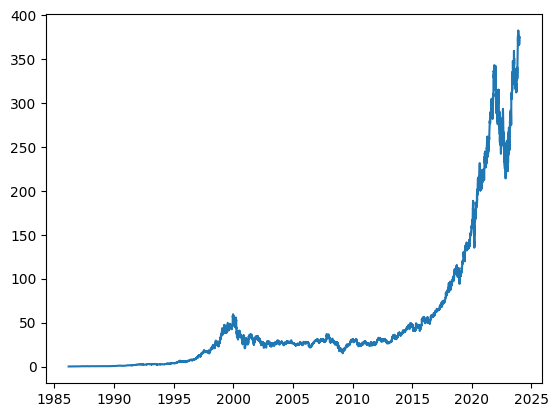

In [ ]:
#Plot to visdualize the current data
plt.plot(df.index, df["Close"])

Since we are using **LSTM** we need to convert this into a supervised problem.

In [ ]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


###Here are a couple of notable issue with my current approch to this task:
* I am trying to predict a **specific price**. I should try to predict the overall movement of the stock(i.e. is it more likely to close on a high or a low) rather than trying to predict the its **closing price**.
* I am using a **`Dense layer`** with a **linear activation function** as the final layer. After some consideration I might use a **sigmoid activation function** since I am trying to predict one of two things(high or low trajectory).
* I did not take advantage of the **LSTM layer** which accels in handling sequential data and taking note of the most important patterns in data while dicarding the rest(**Dimensionality Reduction**).
* Since the only **scaler** I am familiar with is a `MinMaxScaler` I used it to **normalize** the datas which intuitively does not make sense in this context since the stock price has no theoretical maximum. I should look into using dofferent **normalization techniques** such as:

-**Percentage Change**- Instead of **normalizing** raw prices, you can convert prices to percentage changes or returns which are more stationary and typically has a more consistent range.

-**Z-Score Normalizzation**- This method does not require a predefined `min` and `max`. It **normalizes** the data based on the **mean** and **standard deviation** of the dataset.

*  Only looked at hard numbers and did not take into account things such as using **sentimental analysis** to analyze news articles and white papers/balance sheets on the companies finanicals, economic influences and various other things.

#First experiment: Long Short Term Memory
When conducting the experiments before, I only used a **fully connected** model architecture. This time, I will take advantage of the **LSTM** layers since I will be handling long sequence data.

On top of this I will develop **pipelines** for the preprocessing of the data so that I can efficient preprocess the data of various different stock's while adhering to the **DRY**(Don't Repeat Yourself) principle.

Lastly, I will create functions to analyze the model's performance via various metrics.

I will be taking advantage of yfinace API (and maybe googlefinance API) to get real time market data.

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import random

In [ ]:
msft = yf.Ticker("MSFT")

# get historical market data
hist = msft.history(period="10y")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-03-24 00:00:00-04:00,34.160105,34.414145,33.753639,34.295593,46098400,0.0,0.0
2014-03-25 00:00:00-04:00,34.431080,34.710527,33.838316,34.160103,43193100,0.0,0.0
2014-03-26 00:00:00-04:00,34.278649,34.473414,33.533460,33.694355,41977500,0.0,0.0
2014-03-27 00:00:00-04:00,33.652021,33.846786,33.313298,33.330235,35369200,0.0,0.0
2014-03-28 00:00:00-04:00,33.694367,34.414150,33.601218,34.126236,43472700,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-18 00:00:00-04:00,414.250000,420.730011,413.779999,417.320007,20106000,0.0,0.0
2024-03-19 00:00:00-04:00,417.829987,421.670013,415.549988,421.410004,19837900,0.0,0.0
2024-03-20 00:00:00-04:00,422.000000,425.959991,420.660004,425.230011,17860100,0.0,0.0


In [ ]:
# get all stock info
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

# Dataset
The stock that I will be analyzing is a concatenation of tech stocks to increase my dataset with historical financial data.I will make sure that they are all within the 10 year period so that there are no outlier dates. I will load the data into a dataframe and plot various visualizations of the distributions.

In [ ]:
GOOG = yf.Ticker("GOOG")

GOOG.info

{'address1': '1600 Amphitheatre Parkway',
 'city': 'Mountain View',
 'state': 'CA',
 'zip': '94043',
 'country': 'United States',
 'phone': '650 253 0000',
 'website': 'https://abc.xyz',
 'industry': 'Internet Content & Information',
 'industryKey': 'internet-content-information',
 'industryDisp': 'Internet Content & Information',
 'sector': 'Communication Services',
 'sectorKey': 'communication-services',
 'sectorDisp': 'Communication Services',
 'longBusinessSummary': 'Alphabet Inc. offers various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, including ads, Android, Chrome, devices, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play and YouTube;

In [ ]:
df1 = pd.DataFrame(GOOG.history(period="10y"))
df2 = pd.DataFrame(msft.history(period="10y"))
AMZN = yf.Ticker("AMZN")
df3 = pd.DataFrame(AMZN.history(period="10y"))
META = yf.Ticker("META")
df4 = pd.DataFrame(META.history(period="10y"))
AAPL = yf.Ticker("AAPL")
df5 = pd.DataFrame(AAPL.history(period="10y"))

From looking at the data I will:
* Drop the date column since it does not contribute to the closing price
* Drop the **dividends** and **Stock Splits** columns since there values are 0.
* Make the **Open**, **High**, **Low** and **Volume** columns the features, since they can have an effect on the **Closing price**.
* Make the **Close** column my label, since thats what I want the model to predict

In [ ]:
#Combines all of the financial data in the last 10 years of these stocks into one mega dataset
combined_df = pd.concat([df1, df2, df3, df4, df5])
#Counts the number of N/A values within the dataset
na_count = combined_df.isna().sum()
print(f"The number of N/A values are: {na_count} \n")
null_count = combined_df.isnull().sum()
print(f"The number of N/A values are: {null_count} \n")

The number of N/A values are: Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64 

The number of N/A values are: Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64 



Perfect there seems to be no **missing values** and no **N/A values**.

In [ ]:
#Creates the features
features = combined_df.drop(columns = ["Close", "Dividends", "Stock Splits"])
features.head()

,Open,High,Low,Volume
Date,,,,
2014-03-24 00:00:00-04:00,29.494200,29.511883,28.541767,121939352
2014-03-25 00:00:00-04:00,29.041147,29.136787,28.567921,96769361
2014-03-26 00:00:00-04:00,28.941769,29.179876,28.181868,103586819
2014-03-27 00:00:00-04:00,28.322241,28.322241,27.570307,262719
2014-03-28 00:00:00-04:00,27.983171,28.243956,27.857019,824257


<Axes: xlabel='Date'>

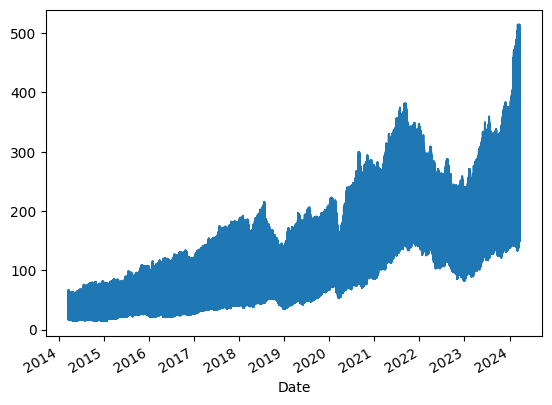

In [ ]:
features["Open"].plot()

In [ ]:
labels = combined_df["Close"]
labels.head()

Date
2014-03-24 00:00:00-04:00    28.840151
2014-03-25 00:00:00-04:00    28.859825
2014-03-26 00:00:00-04:00    28.193575
2014-03-27 00:00:00-04:00    27.846546
2014-03-28 00:00:00-04:00    27.922838
Name: Close, dtype: float64

In [ ]:
features.head(), labels.head()

(                                Open       High        Low     Volume
 Date                                                                 
 2014-03-24 00:00:00-04:00  29.494200  29.511883  28.541767  121939352
 2014-03-25 00:00:00-04:00  29.041147  29.136787  28.567921   96769361
 2014-03-26 00:00:00-04:00  28.941769  29.179876  28.181868  103586819
 2014-03-27 00:00:00-04:00  28.322241  28.322241  27.570307     262719
 2014-03-28 00:00:00-04:00  27.983171  28.243956  27.857019     824257,
 Date
 2014-03-24 00:00:00-04:00    28.840151
 2014-03-25 00:00:00-04:00    28.859825
 2014-03-26 00:00:00-04:00    28.193575
 2014-03-27 00:00:00-04:00    27.846546
 2014-03-28 00:00:00-04:00    27.922838
 Name: Close, dtype: float64)

The dataset contains 4932 features and labels respectively.

In [ ]:
len(features), len(labels)

(12590, 12590)

Now that I've properly split the dataset into features and labels its time to preprocess it for the neural network.
* **Normalization** - I will normalize the data to keep it's values within the range of 0-1 via the **MinMaxScaler**. This will allow me to do so, while keeping the original distributions.
* **Encoders** - Since there is no non numerical data, there will be no need for me to use an encoder
* **Training** and **Testing datasets** - In order to get a proper evaluation of the models performance and make sure that it generalizes well to new data, I will create a train dataset for training the model and a test dataset for testing the models predictions. The split will be **80%** for training and **20%** for testing.

# Creating Training and Testing datasets
Will use **train_test_split** to split the dataset into a training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)
len(X_train), len(y_train), X_train, y_train

(10072,
 10072,
                                  Open        High         Low     Volume
 Date                                                                    
 2018-03-14 00:00:00-04:00   89.041067   89.312535   87.524596   32132000
 2018-01-02 00:00:00-05:00   80.248634   80.416343   79.661656   22483800
 2014-08-15 00:00:00-04:00   38.016886   38.289775   37.863385   41611300
 2016-09-07 00:00:00-04:00   24.927999   25.142996   24.752303  169457200
 2018-03-16 00:00:00-04:00   42.351646   42.463066   42.107469  157618800
 ...                               ...         ...         ...        ...
 2021-09-27 00:00:00-04:00  143.434056  143.917203  141.807154   74150700
 2014-10-31 00:00:00-04:00   15.257500   15.286000   15.075000   91014000
 2015-08-18 00:00:00-04:00   26.752001   26.974501   26.650000   41426000
 2017-08-21 00:00:00-04:00   45.500000   45.650002   45.169998   18868000
 2023-02-06 00:00:00-05:00  102.930000  103.949997  100.650002   81945200
 
 [10072 rows x 4 col

# Creating Sequences from the DataFrame
The current **dataframe** is a **time series dataframe** due to it having a **timestamp** per row alongside every **feature** of the row. In order to feed the data the the **LSTM** model, I will need to create **sequences** out of the dataframe so that the model can accept it.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled, X_test_scaled

(array([[0.14949562, 0.14692404, 0.1490913 , 0.04208415],
        [0.13192797, 0.12944794, 0.13310355, 0.02938503],
        [0.04754717, 0.04669251, 0.04811489, 0.05456097],
        ...,
        [0.02503946, 0.02446425, 0.02531465, 0.05431707],
        [0.06249875, 0.06115129, 0.06297147, 0.02462585],
        [0.17724629, 0.17567856, 0.17577926, 0.10764913]]),
 array([[0.31713612, 0.31892341, 0.322413  , 0.01332958],
        [0.21596876, 0.21571503, 0.21070691, 0.20301583],
        [0.06638344, 0.06677994, 0.06782584, 0.0229985 ],
        ...,
        [0.32643548, 0.32954495, 0.33262552, 0.01542647],
        [0.54560155, 0.54932543, 0.54474621, 0.01607683],
        [0.47629942, 0.477558  , 0.47800911, 0.03825098]]))

You need to structure your data into sequences so that the LSTM can process. Each sequence contains **n** consecutive data points, where **n** is the number of timesteps. Since the **sequnces** are being made after the **MinMaxScaler**, I am now working with a **Numpy Array**.

In [ ]:
import numpy as np

# Create sequences
def create_sequences(X, y, n_steps): #n_steps is the sequence length that i want to cfreate
    Xs, ys = [], []
    for i in range(len(X) - n_steps): #Iterates over the dataset
        Xs.append(X[i:(i + n_steps)])
        ys.append(y[i + n_steps])
    return np.array(Xs), np.array(ys)



# Example usage:
n_steps = 5  # Number of timesteps in each sequence
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, n_steps)

X_train_seq, y_train_seq

(array([[[0.14949562, 0.14692404, 0.1490913 , 0.04208415],
         [0.13192797, 0.12944794, 0.13310355, 0.02938503],
         [0.04754717, 0.04669251, 0.04811489, 0.05456097],
         [0.02139503, 0.02086635, 0.02145606, 0.22283391],
         [0.0562082 , 0.05489072, 0.05674441, 0.207252  ]],
 
        [[0.13192797, 0.12944794, 0.13310355, 0.02938503],
         [0.04754717, 0.04669251, 0.04811489, 0.05456097],
         [0.02139503, 0.02086635, 0.02145606, 0.22283391],
         [0.0562082 , 0.05489072, 0.05674441, 0.207252  ],
         [0.59182987, 0.58546652, 0.59918298, 0.03179528]],
 
        [[0.04754717, 0.04669251, 0.04811489, 0.05456097],
         [0.02139503, 0.02086635, 0.02145606, 0.22283391],
         [0.0562082 , 0.05489072, 0.05674441, 0.207252  ],
         [0.59182987, 0.58546652, 0.59918298, 0.03179528],
         [0.02730098, 0.02647889, 0.02768647, 0.12463728]],
 
        ...,
 
        [[0.13003257, 0.12750933, 0.13041214, 0.14872142],
         [0.04913684, 0.04808771

In [ ]:
#Creating the test set sequences
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, n_steps)
X_test_seq, y_test_seq

(array([[[0.31713612, 0.31892341, 0.322413  , 0.01332958],
         [0.21596876, 0.21571503, 0.21070691, 0.20301583],
         [0.06638344, 0.06677994, 0.06782584, 0.0229985 ],
         [0.09878976, 0.09900326, 0.10075195, 0.10490386],
         [0.38964608, 0.3996304 , 0.39598953, 0.03573466]],
 
        [[0.21596876, 0.21571503, 0.21070691, 0.20301583],
         [0.06638344, 0.06677994, 0.06782584, 0.0229985 ],
         [0.09878976, 0.09900326, 0.10075195, 0.10490386],
         [0.38964608, 0.3996304 , 0.39598953, 0.03573466],
         [0.34638226, 0.34753888, 0.34952957, 0.08172671]],
 
        [[0.06638344, 0.06677994, 0.06782584, 0.0229985 ],
         [0.09878976, 0.09900326, 0.10075195, 0.10490386],
         [0.38964608, 0.3996304 , 0.39598953, 0.03573466],
         [0.34638226, 0.34753888, 0.34952957, 0.08172671],
         [0.21322113, 0.21614918, 0.21682986, 0.02681422]],
 
        ...,
 
        [[0.02189456, 0.02173646, 0.02268381, 0.11549662],
         [0.4803394 , 0.48616052

This create sequences function will make sure that y is the same length as x while not making y a sequence.

In [ ]:
import numpy as np

def create_sequences(X, y, n_steps):
    Xs, ys = [], []
    for i in range(len(X) - n_steps):
        Xs.append(X[i:i + n_steps, :])  # Assuming X is a 2D NumPy array
        ys.append(y[i + n_steps])       # Assuming y is a 1D NumPy array
    return np.array(Xs), np.array(ys)

n_steps = 5  # Number of timesteps in each sequence
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, n_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, n_steps)
X_train_seq, y_train_seq, X_test_seq, y_test_seq


(array([[[0.14949562, 0.14692404, 0.1490913 , 0.04208415],
         [0.13192797, 0.12944794, 0.13310355, 0.02938503],
         [0.04754717, 0.04669251, 0.04811489, 0.05456097],
         [0.02139503, 0.02086635, 0.02145606, 0.22283391],
         [0.0562082 , 0.05489072, 0.05674441, 0.207252  ]],
 
        [[0.13192797, 0.12944794, 0.13310355, 0.02938503],
         [0.04754717, 0.04669251, 0.04811489, 0.05456097],
         [0.02139503, 0.02086635, 0.02145606, 0.22283391],
         [0.0562082 , 0.05489072, 0.05674441, 0.207252  ],
         [0.59182987, 0.58546652, 0.59918298, 0.03179528]],
 
        [[0.04754717, 0.04669251, 0.04811489, 0.05456097],
         [0.02139503, 0.02086635, 0.02145606, 0.22283391],
         [0.0562082 , 0.05489072, 0.05674441, 0.207252  ],
         [0.59182987, 0.58546652, 0.59918298, 0.03179528],
         [0.02730098, 0.02647889, 0.02768647, 0.12463728]],
 
        ...,
 
        [[0.13003257, 0.12750933, 0.13041214, 0.14872142],
         [0.04913684, 0.04808771

In [ ]:
len(X_train_seq), len(y_train_seq), len(X_test_seq), len(y_test_seq)

(10067, 10067, 2513, 2513)

# Creating the model
Now its time to create the model. As mentioned earlier I will now use the **LSTM** layers. This is because **LSTM** are particularly well-suited for making predictions based on time series data, like stock prices, because they can capture temporal dependencies and patterns over different time intervals.

* **Memory Cell:** Each **LSTM unit** has a memory cell that can maintain information in memory for long periods. This is crucial for understanding context in time series data.

* **Gates:** LSTMs have three types of gates that regulate the flow of information: the **input gate**, which controls the extent to which a new value flows into the memory cell; the **forget gate**, which controls the extent to which a value remains in the memory cell; and the **output gate**, which controls the extent to which the value in the memory cell is used to compute the output activation of the block.

* **Handling Long-Term Dependencies:** Traditional RNNs often face issues with **vanishing** or **exploding gradients**, making it hard to learn long-term dependencies. **LSTMs** address this problem, making them effective for tasks where understanding long-term dependencies is crucial.

In [ ]:
X_train_seq.shape

(10067, 5, 4)

In [ ]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MSE, MAE
from tensorflow.keras.optimizers import Adam, SGD

def create_model1():
  model_1 = tf.keras.models.Sequential([
     LSTM(50, return_sequences = True), #By default, the LSTM layer has the tanh activation function
     LSTM(10),
     Dense(1, activation = "linear") #Will return one values, which is the closing price. The linear actiation function just returns the value

  ])

  model_1.compile( loss = MAE,
                optimizer = Adam(),
                 metrics = ["MAE"])
  return model_1

In [ ]:
model_1 = create_model1()

history_1 = model_1.fit(X_train_seq, y_train_seq, epochs = 10, steps_per_epoch = len(X_train_seq), validation_data = (X_test_seq, y_test_seq),
validation_steps = len(X_test_seq))

Epoch 1/10
10067/10067 [==============================] - 58s 5ms/step - loss: 81.6822 - MAE: 81.6822 - val_loss: 69.2370 - val_MAE: 69.2370
Epoch 2/10
10067/10067 [==============================] - 57s 6ms/step - loss: 68.4836 - MAE: 68.4836 - val_loss: 66.2320 - val_MAE: 66.2320
Epoch 3/10
10067/10067 [==============================] - 52s 5ms/step - loss: 66.9688 - MAE: 66.9688 - val_loss: 65.7479 - val_MAE: 65.7479
Epoch 4/10
10067/10067 [==============================] - 52s 5ms/step - loss: 66.7498 - MAE: 66.7498 - val_loss: 65.7033 - val_MAE: 65.7033
Epoch 5/10
10067/10067 [==============================] - 57s 6ms/step - loss: 66.7197 - MAE: 66.7197 - val_loss: 65.7057 - val_MAE: 65.7057
Epoch 6/10
10067/10067 [==============================] - 53s 5ms/step - loss: 66.7163 - MAE: 66.7163 - val_loss: 65.7103 - val_MAE: 65.7103
Epoch 7/10
10067/10067 [==============================] - 58s 6ms/step - loss: 66.7166 - MAE: 66.7166 - val_loss: 65.7103 - val_MAE: 65.7103
Epoch 8/10
10

# Base model results
Since this was the first model I will treat it as the base. Now, when it comes to the actual results a validation loss of 65% is not good. That means that the model has an accuracy of 35%, but thats ok. Now that I have a benchmark, I can now start optimizing the models **hyperparameters** and messing around with its architecture. Not only that, but because the dataset is from the stock market, I can also increase the dataset if I feel like its a neccessity. But for now, I'll stick to the model.

# Changes that I'll will make
* **Increase the layers and number of neurons in the model** - The model may be to simple to detect any meaningful patterns within the data, causing it to **underfit**. I will increase the models complexity to see if theres an improvement to performance.
* **Create a EarlyStopping callback to stop the training process before overfitting** - I will implement a **EarlyStopping callback** to make sure to avoid **overfitting** while I mess around with other **hyperparameters**.
* **Create a LearningRateScheduler for exponential learning rate decay** - I plan on messing around with the learning rate(most likely increasing it) so I want to implement **Exponential Learning Rate Deacay** after certain epochs to increase/optimize model's performance and avoid **overfitting**.
* **Add more data** - If all of these experiments do not yeild notable results, I will increase the dataset and see of the performances improve.
* **Create functions to get a deeper evaluation of models performance** - I will create functions to test and evaluate the model's predictions such as a function that plots the **loss curves** and a function that calculates the **Mean Square Error(MSE)**, **Root Mean Square Error(RMSE)**, **Mean Absolute Error(MAE)**, **R-Squared(R2)**, and the **Explained Variance(EV)**.

# Helper Functions
I Will create helper functions that will allow me to streamline the process of analyzing a models performance.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def deep_analysis_reg(model, X_test, y_test):
  """
  This function will take in a model, the test set along with the proper predictions and evaluate the models performance.
  """
  #Will store the models predictions to use for perfomance anlysis
  preds = model.predict(X_test)

  #Lower values for the error metrics indicates better performance
  mse = mean_squared_error(y_test, preds)
  rmse = mean_squared_error(y_test, preds, squared=False)
  mae = mean_absolute_error(y_test, preds)
  #Higher values for r2 and explained variance indicates good performance
  r2 = r2_score(y_test, preds)
  evs = explained_variance_score(y_test, preds)

  print(f"Mean Squared Error: {mse}")
  print(f"Root Mean Squared Error: {rmse}")
  print(f"Mean Absolute Error: {mae}")
  print(f"R-Squared: {r2}")
  print(f"Explained Variance Score: {evs}")

  obj = {
      "MSE":mse,
      "RMSE":rmse,
      "MAE":mae,
      "R2":r2,
      "EVS":evs
  }
  #Returns all the metrics in an object when done
  return obj






# Experiment 2
For the second experiment, I will increase the model's complexity but leave everything else the same.

In [ ]:
model_2 = tf.keras.models.Sequential([
    LSTM(100, return_sequences = True),  #Will set return_sequences to all layers but last LSTM layer
    LSTM(100, return_sequences = True),
    LSTM(100),
    Dense(1, activation = "linear")
])

model_2.compile(loss = MAE,
                optimizer = Adam(),
                metrics = ["MAE"])

In [ ]:
history_2 = model_2.fit(X_train_seq, y_train_seq, epochs = 10, steps_per_epoch = len(X_train_seq), validation_data = (X_test_seq, y_test_seq),
validation_steps = len(X_test_seq))

Epoch 1/10
10067/10067 [==============================] - 106s 7ms/step - loss: 68.2163 - MAE: 68.2163 - val_loss: 65.7367 - val_MAE: 65.7367
Epoch 2/10
10067/10067 [==============================] - 66s 7ms/step - loss: 66.7462 - MAE: 66.7462 - val_loss: 65.7063 - val_MAE: 65.7063
Epoch 3/10
10067/10067 [==============================] - 72s 7ms/step - loss: 66.7536 - MAE: 66.7536 - val_loss: 65.7023 - val_MAE: 65.7023
Epoch 4/10
10067/10067 [==============================] - 87s 9ms/step - loss: 66.7495 - MAE: 66.7495 - val_loss: 65.7037 - val_MAE: 65.7037
Epoch 5/10
10067/10067 [==============================] - 89s 9ms/step - loss: 66.7429 - MAE: 66.7429 - val_loss: 65.7055 - val_MAE: 65.7055
Epoch 6/10
10067/10067 [==============================] - 85s 8ms/step - loss: 66.7411 - MAE: 66.7411 - val_loss: 65.7029 - val_MAE: 65.7029
Epoch 7/10
10067/10067 [==============================] - 77s 8ms/step - loss: 66.7464 - MAE: 66.7464 - val_loss: 65.7552 - val_MAE: 65.7552
Epoch 8/10
1

In [ ]:
analysis_2 = deep_analysis_reg(model = model_2, X_test = X_test_seq, y_test = y_test_seq)

79/79 [==============================] - 0s 3ms/step
Mean Squared Error: 7574.579209293798
Root Mean Squared Error: 87.03205851462896
Mean Absolute Error: 65.72078345450944
R-Squared: -0.04618906745832407
Explained Variance Score: 0.0


# Analysis of experiment 2
So, the permance is still bad, but one thing that i noticed was the this is a **many-to-one** problem not a **many-to-many** problem. That means that I should not be turning y-test into a sequence, since the model is trying to predict one value per sequence. Will see if theres an improvement in results after I make the adjustment. Will keep the smae architecture to keep analysis same.

In [ ]:
random.seed(42)

model_3 = tf.keras.models.Sequential([
    LSTM(100, return_sequences = True),  #Will set return_sequences to all layers but last LSTM layer
    LSTM(100, return_sequences = True),
    LSTM(100),
    Dense(1, activation = "linear")
])

model_3.compile(loss = MAE,
                optimizer = Adam(),
                metrics = ["MAE"])

history_3 = model_3.fit(X_train_seq, y_train_seq, epochs = 10, steps_per_epoch = len(X_train_seq), validation_data = (X_test_seq, y_test_seq),
validation_steps = len(X_test_seq))

Epoch 1/10
10067/10067 [==============================] - 76s 7ms/step - loss: 68.2770 - MAE: 68.2770 - val_loss: 65.8055 - val_MAE: 65.8055
Epoch 2/10
10067/10067 [==============================] - 70s 7ms/step - loss: 66.7519 - MAE: 66.7519 - val_loss: 65.7048 - val_MAE: 65.7048
Epoch 3/10
10067/10067 [==============================] - 66s 7ms/step - loss: 66.7530 - MAE: 66.7530 - val_loss: 65.7525 - val_MAE: 65.7525
Epoch 4/10
10067/10067 [==============================] - 70s 7ms/step - loss: 66.7494 - MAE: 66.7494 - val_loss: 65.7180 - val_MAE: 65.7180
Epoch 5/10
10067/10067 [==============================] - 67s 7ms/step - loss: 66.7465 - MAE: 66.7465 - val_loss: 65.7028 - val_MAE: 65.7028
Epoch 6/10
10067/10067 [==============================] - 71s 7ms/step - loss: 66.7412 - MAE: 66.7412 - val_loss: 65.7773 - val_MAE: 65.7773
Epoch 7/10
10067/10067 [==============================] - 67s 7ms/step - loss: 66.7560 - MAE: 66.7560 - val_loss: 65.7448 - val_MAE: 65.7448
Epoch 8/10
10

In [ ]:
deep_analysis_reg(model = model_3, X_test = X_test_seq, y_test = y_test_seq)

79/79 [==============================] - 2s 3ms/step
Mean Squared Error: 7587.141807669812
Root Mean Squared Error: 87.10420086120882
Mean Absolute Error: 65.7143474090066
R-Squared: -0.04792419395402825
Explained Variance Score: 0.0


{'MSE': 7587.141807669812,
 'RMSE': 87.10420086120882,
 'MAE': 65.7143474090066,
 'R2': -0.04792419395402825,
 'EVS': 0.0}

# Analysis of experiment 3
Will change the temporal window of the sequence to 3 days to see if there a difference while changing the number of neurons to 50.

In [ ]:
n_steps = 3  # Number of timesteps in each sequence
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, n_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, n_steps)
X_train_seq, y_train_seq, X_test_seq, y_test_seq

(array([[[0.14949561, 0.14692402, 0.14909129, 0.04208415],
         [0.13192793, 0.12944789, 0.1331035 , 0.02938503],
         [0.04754717, 0.0466925 , 0.04811488, 0.05456097]],
 
        [[0.13192793, 0.12944789, 0.1331035 , 0.02938503],
         [0.04754717, 0.0466925 , 0.04811488, 0.05456097],
         [0.02139504, 0.02086636, 0.02145606, 0.22283391]],
 
        [[0.04754717, 0.0466925 , 0.04811488, 0.05456097],
         [0.02139504, 0.02086636, 0.02145606, 0.22283391],
         [0.0562082 , 0.05489072, 0.05674441, 0.207252  ]],
 
        ...,
 
        [[0.04354082, 0.04368625, 0.04424274, 0.15095056],
         [0.25817506, 0.25419201, 0.2594643 , 0.09738988],
         [0.00207297, 0.0015028 , 0.00177914, 0.11958564]],
 
        [[0.25817506, 0.25419201, 0.2594643 , 0.09738988],
         [0.00207297, 0.0015028 , 0.00177914, 0.11958564],
         [0.02503946, 0.02446425, 0.02531465, 0.05431707]],
 
        [[0.00207297, 0.0015028 , 0.00177914, 0.11958564],
         [0.02503946, 0.02

In [ ]:
random.seed(42)

model_4 = tf.keras.models.Sequential([
    LSTM(50, return_sequences = True),  #Will set return_sequences to all layers but last LSTM layer
    LSTM(50, return_sequences = True),
    LSTM(50),
    Dense(1, activation = "linear")
])

model_4.compile(loss = MAE,
                optimizer = Adam(),
                metrics = ["MAE"])

history_4 = model_4.fit(X_train_seq, y_train_seq, epochs = 5, steps_per_epoch = len(X_train_seq), validation_data = (X_test_seq, y_test_seq),
validation_steps = len(X_test_seq))

Epoch 1/5
10069/10069 [==============================] - 103s 7ms/step - loss: 69.8609 - MAE: 69.8609 - val_loss: 65.7173 - val_MAE: 65.7173
Epoch 2/5
10069/10069 [==============================] - 66s 7ms/step - loss: 66.7309 - MAE: 66.7309 - val_loss: 65.7246 - val_MAE: 65.7246
Epoch 3/5
10069/10069 [==============================] - 66s 7ms/step - loss: 66.7321 - MAE: 66.7321 - val_loss: 65.7065 - val_MAE: 65.7065
Epoch 4/5
10069/10069 [==============================] - 65s 6ms/step - loss: 66.7294 - MAE: 66.7294 - val_loss: 65.7538 - val_MAE: 65.7538
Epoch 5/5
10069/10069 [==============================] - 66s 7ms/step - loss: 66.7344 - MAE: 66.7344 - val_loss: 65.7086 - val_MAE: 65.7086


In [ ]:
deep_analysis_reg(model = model_4, X_test = X_test_seq, y_test = y_test_seq)

79/79 [==============================] - 2s 3ms/step
Mean Squared Error: 7614.8748064503425
Root Mean Squared Error: 87.2632500337361
Mean Absolute Error: 65.7085636138916
R-Squared: -0.051968367234902724
Explained Variance Score: 1.155448865364228e-06


{'MSE': 7614.8748064503425,
 'RMSE': 87.2632500337361,
 'MAE': 65.7085636138916,
 'R2': -0.051968367234902724,
 'EVS': 1.155448865364228e-06}

# Experiment 4
Since there is still not any notable increase in performance I will increase the learning rate and see if that fixes the issue.

In [ ]:
random.seed(42)

model_5 = tf.keras.models.Sequential([
    LSTM(50, return_sequences = True),  #Will set return_sequences to all layers but last LSTM layer
    LSTM(50, return_sequences = True),
    LSTM(50),
    Dense(1, activation = "linear")
])

model_5.compile(loss = MAE,
                optimizer = Adam(learning_rate = 0.1),
                metrics = ["MAE"])

history_5 = model_5.fit(X_train_seq, y_train_seq, epochs = 5, steps_per_epoch = len(X_train_seq), validation_data = (X_test_seq, y_test_seq),
validation_steps = len(X_test_seq))

Epoch 1/5
10069/10069 [==============================] - 79s 7ms/step - loss: 67.7213 - MAE: 67.7213 - val_loss: 66.5141 - val_MAE: 66.5141
Epoch 2/5
10069/10069 [==============================] - 69s 7ms/step - loss: 67.7849 - MAE: 67.7849 - val_loss: 66.0267 - val_MAE: 66.0267
Epoch 3/5
10069/10069 [==============================] - 64s 6ms/step - loss: 67.6238 - MAE: 67.6238 - val_loss: 66.2186 - val_MAE: 66.2186
Epoch 4/5
10069/10069 [==============================] - 69s 7ms/step - loss: 67.8401 - MAE: 67.8401 - val_loss: 66.1678 - val_MAE: 66.1678
Epoch 5/5
10069/10069 [==============================] - 66s 7ms/step - loss: 67.6290 - MAE: 67.6290 - val_loss: 65.8087 - val_MAE: 65.8087


# Experiment 5 analysis
Since the loss is not decreasing, I might be facing a **vanishing gradient** problem(the **gradient** becomes so small that the model can't properly learn the weights), so I will implement **gradient clipping** to try an handle this issue. On top of that i will implement **BatchNormalization**. **Batch normalization** standardizes the inputs to a layer for each mini-batch, stabilizing the learning process.

In [ ]:
random.seed(42)
from tensorflow.keras.layers import BatchNormalization

model_6 = tf.keras.models.Sequential([
    LSTM(50, return_sequences = True),  #Will set return_sequences to all layers but last LSTM layer
    BatchNormalization(),
    LSTM(50, return_sequences = True),
    BatchNormalization(),
    LSTM(50, activation ="relu"),
    Dense(1, activation = "linear")
])

model_6.compile(loss = MAE,
                optimizer = Adam(learning_rate = 0.01, clipvalue=0.5),  # Clipvalue restricts gradients to [-1, 1]
                metrics = ["MAE"])

history_6 = model_6.fit(X_train_seq, y_train_seq, epochs = 5, steps_per_epoch = len(X_train_seq), validation_data = (X_test_seq, y_test_seq),
validation_steps = len(X_test_seq))

Epoch 1/5
10069/10069 [==============================] - 143s 14ms/step - loss: 69.0390 - MAE: 69.0390 - val_loss: 127.0108 - val_MAE: 127.0108
Epoch 2/5
 3560/10069 [=========>....................] - ETA: 1:19 - loss: 67.7009 - MAE: 67.7009

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam

model_7 = tf.keras.models.Sequential([
    LSTM(100, return_sequences=True, activation='tanh'),  # LSTM default activation is 'tanh'
    LSTM(100, return_sequences=True),
    LSTM(100, activation='relu'),  # Using ReLU in the last LSTM layer
    Dropout(0.5),
    Dense(1)  # Using LeakyReLU in the Dense layer
])



# Define an optimizer with gradient clipping
optimizer = Adam(learning_rate=0.001, clipvalue=1.0)  # Clipvalue restricts gradients to [-1, 1]

# Compile the model with this optimizer
model_7.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['MAE'])



In [ ]:
history_7 = model_7.fit(X_train_seq, y_train_seq, epochs = 5, steps_per_epoch = len(X_train_seq), validation_data = (X_test_seq, y_test_seq),
validation_steps = len(X_test_seq))

Epoch 1/5
10067/10067 [==============================] - 115s 11ms/step - loss: 70.5568 - MAE: 70.5568 - val_loss: 65.7315 - val_MAE: 65.7315
Epoch 2/5
10067/10067 [==============================] - 106s 10ms/step - loss: 69.3293 - MAE: 69.3293 - val_loss: 66.4745 - val_MAE: 66.4745
Epoch 3/5
10067/10067 [==============================] - 111s 11ms/step - loss: 70.1035 - MAE: 70.1035 - val_loss: 67.1328 - val_MAE: 67.1328
Epoch 4/5
10067/10067 [==============================] - 107s 11ms/step - loss: 69.8265 - MAE: 69.8265 - val_loss: 65.7521 - val_MAE: 65.7521
Epoch 5/5
10067/10067 [==============================] - 108s 11ms/step - loss: 69.8083 - MAE: 69.8083 - val_loss: 65.6781 - val_MAE: 65.6781


# The Pipeline
When it comes to keras/tensorflow models, the sklearn pipeline is not fully compatable with it due to it having a fit_transform feature that the models dont. To use a keras/tensorflow model with the sklearn pipeline I need to import the **`KerasClassifier`**. The **KerasClassifier** is a **sklearn wrapper** around the Keras model which allows it to be used like a standard **sklearn estimator**.  

In [ ]:
#Need to upgrade tensorflow since the keras classifier is a part of tensorflow 2.0
!pip install keras==2.12.0

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


# Create a KerasClassifier, which is a scikit-learn wrapper for Keras models
model = KerasRegressor(build_fn=create_model1, epochs=10, batch_size=10, verbose=0)
#Create the pipeline with the lstm neural network
pipeline = Pipeline([("Scaler",MinMaxScaler()),
                        ("NeuralNetwork", model)])


pipeline.fit(X_train, y_train)

<ipython-input-24-1591f24ffb78>:7: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model1, epochs=10, batch_size=10, verbose=0)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "lstm_2" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 4)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 4), dtype=float32)
      • training=True
      • mask=None


In [ ]:
pipeline.predict(x_test)